### Simulation

In [14]:
from bmc.simulate import simulate
import numpy as np
import matplotlib.pyplot as plt

In [15]:
low = -20e-6
high = 20e-6 
n_iso = 1000
mean = (low + high) / 2
std_dev = (high - low) / 6 

# z_pos = np.random.normal(loc=mean, scale=std_dev, size=n_iso)
z_pos = np.linspace(low, high, n_iso)
z_pos = np.append(z_pos, 0)
z_pos = np.clip(z_pos, low, high)
z_pos = np.sort(z_pos)

# plt.plot(z_pos, 'o')

np.where(z_pos == 0)[0][0]


500

In [34]:
seq_path_gauss = 'seq_lib/1_ETM.seq'
config_path = 'sim_lib/config_1pool.yaml'

adc_time = 3e-3
retun_zmag = False
show_plot = False
write_all_mag = True
webhook = True
plt_range = [0, 4]
iso_select = [-5,0,5]

In [35]:
sim = simulate(config_file=config_path, 
                   seq_file=seq_path_gauss, 
                   adc_time=adc_time,
                   z_positions=z_pos,
                   return_zmag=retun_zmag,
                   iso_select=iso_select,
                   show_plot=show_plot,
                   write_all_mag=write_all_mag,
                   webhook=webhook,
                   plt_range=plt_range)  # simulation mac

BMCTool simulation: 100%|██████████| 12/12 [00:19<00:00,  1.66s/it]


['rf at 0.0000s', 'delay at 0.0020s', 'gz at 0.0025s', 'delay at 0.0030s', 'rf at 0.0035s', 'gz at 0.0055s', 'rf at 0.0135s', 'delay at 0.0155s', 'gz at 0.0160s', 'delay at 0.0165s', 'rf at 0.0170s', 'gz at 0.0190s']
[]


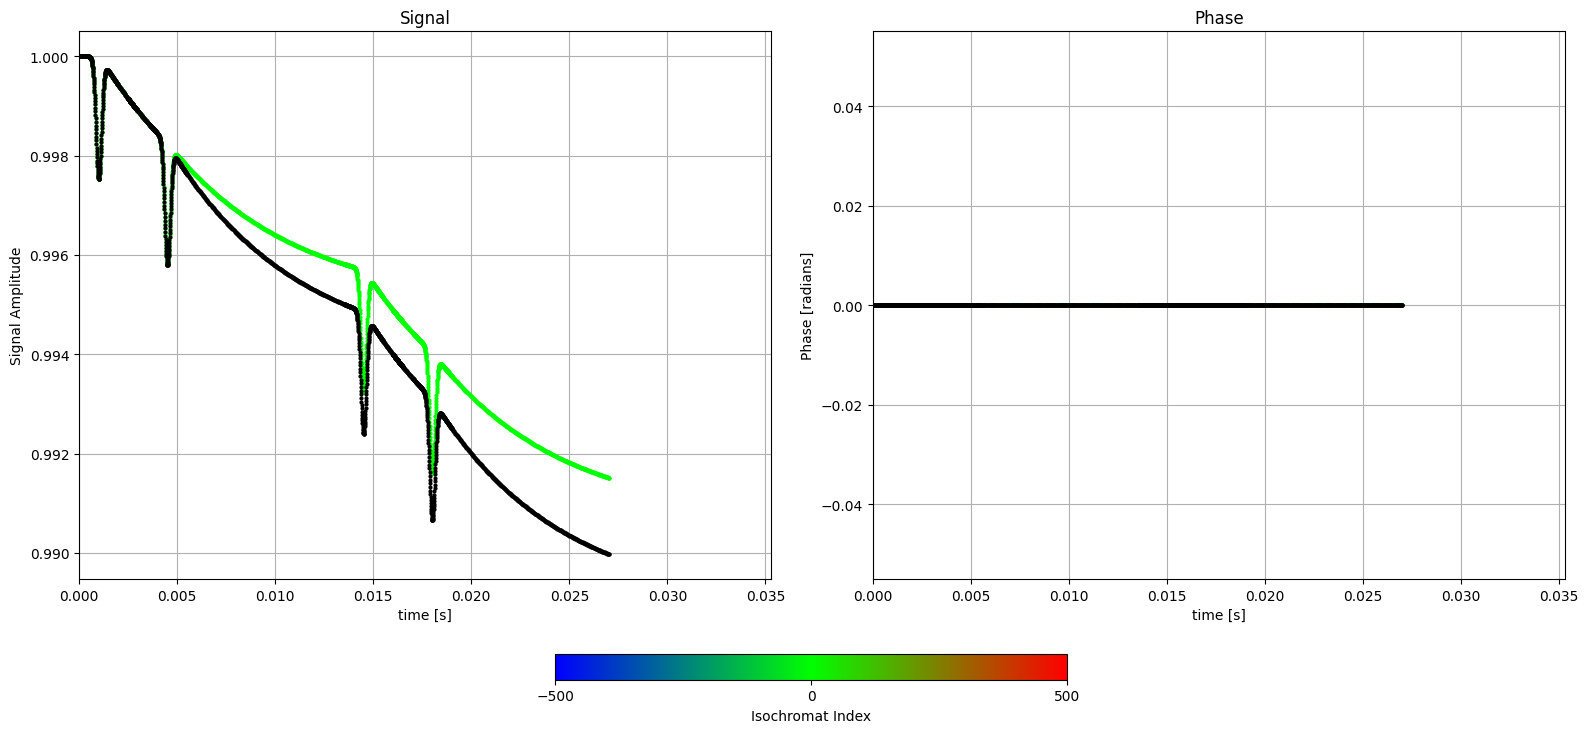

In [36]:
from bmc.utils.eval import plot_sim
time, m_z, m_z_total, m_c, m_c_total = sim.get_mag(return_cest_pool=False)

iso_select = [0]
plt_range = [0.0, 0.0353] #1ETM
# plt_range = [0.015, 0.02]
# plt_range = [0.0286, 0.0360]
# plt_range = [0.0675, 0.09]
# plt_range = [0.0204, 0.021] #wex

_ = plot_sim(m_out=[m_z, m_z_total], time=time, plt_range=plt_range, iso_select=iso_select)
# _ = plot_sim(m_out=[m_c, m_c_total], time=time, plt_range=plt_range, iso_select=iso_select)

m_trans_plus = np.abs(m_c_total)[-900:]
m_z_plus = m_z_total



### Animation

In [19]:
run_time = .1
track_path = True
ie = True
timing = False
total_mag = True
animate_cest = True
kwargs = {'quality': '-pql', 'write': ''}  #--write_to_movie

In [20]:
# sim.animate(run_time=run_time, 
#             track_path=track_path, 
#             ie=ie, 
#             timing=timing,
#             total_mag=total_mag,
#             animate_cest=animate_cest,
#             **kwargs)

In [21]:
seq_path_gauss = 'seq_lib/1_ETM_minus.seq'
config_path = 'sim_lib/config_1pool.yaml'

adc_time = 3e-3
retun_zmag = False
show_plot = False
write_all_mag = True
webhook = True
plt_range = [0, 4]
iso_select = [-5,0,5]

In [22]:
sim_minus = simulate(config_file=config_path, 
                   seq_file=seq_path_gauss, 
                   adc_time=adc_time,
                   z_positions=z_pos,
                   return_zmag=retun_zmag,
                   iso_select=iso_select,
                   show_plot=show_plot,
                   write_all_mag=write_all_mag,
                   webhook=webhook,
                   plt_range=plt_range)  # simulation mac

BMCTool simulation: 100%|██████████| 9/9 [00:17<00:00,  1.91s/it]


['rf at 0.0000s', 'delay at 0.0020s', 'gz at 0.0025s', 'delay at 0.0030s', 'rf at 0.0035s', 'gz at 0.0055s', 'rf at 0.0135s', 'gz at 0.0155s', 'adc at 0.0160s']
[]


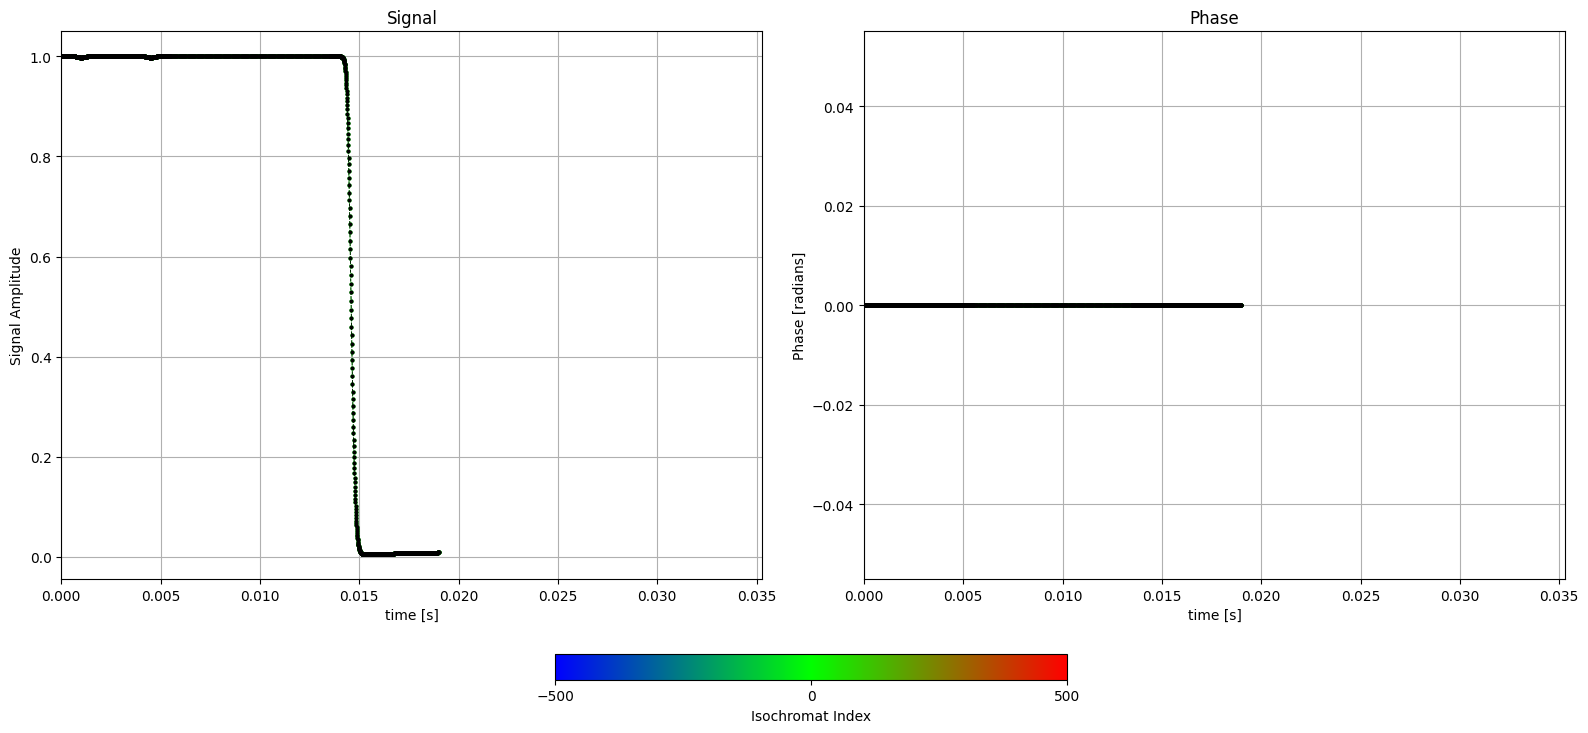

In [23]:
from bmc.utils.eval import plot_sim
time, m_z, m_z_total, m_c, m_c_total = sim_minus.get_mag(return_cest_pool=False)


iso_select = [0]
plt_range = [0.0, 0.0353] #1ETM
# plt_range = [0.015, 0.02]
# plt_range = [0.0286, 0.0360]
# plt_range = [0.0675, 0.09]
# plt_range = [0.0204, 0.021] #wex

_ = plot_sim(m_out=[m_z, m_z_total], time=time, plt_range=plt_range, iso_select=iso_select)
# _ = plot_sim(m_out=[m_c, m_c_total], time=time, plt_range=plt_range, iso_select=iso_select)

m_trans_minus = np.abs(m_c_total)[-900:]

In [24]:
x_rf = np.arange(0, 2e-3, 2e-3/300)
# x_spoil = np.arange(2e-3,2.5e-3, 0.5e-3/300)
x_spoil = np.arange(2e-3,3e-3, 1e-3/300)
# x_adc = np.arange(2.5e-3, 5.5e-3, 3e-3/300)
x_adc = np.arange(3e-3, 6e-3, 3e-3/300)


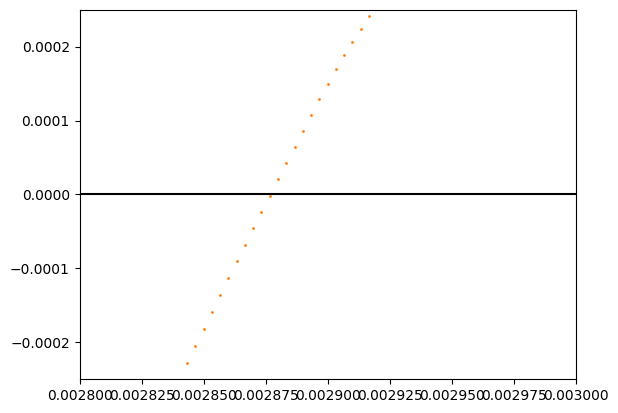

In [25]:
# plt.plot(x_spoil, (np.abs(m_trans_plus)-np.abs(m_trans_minus))[:300])
# plt.plot(x_adc, (np.abs(m_trans_plus)-np.abs(m_trans_minus))[300:])
plt.plot(x_rf,(m_trans_plus-m_trans_minus)[:300], 'o', markersize=1)
plt.plot(x_spoil,(m_trans_plus-m_trans_minus)[300:600], 'o', markersize=1)
plt.plot(x_adc,(m_trans_plus-m_trans_minus)[600:], 'o', markersize=1)
plt.axhline(0, c='black')
# plt.axhline(0.0055)
# plt.axvline(0.002476)

# plt.scatter(0.002476, 0.0055, c='b')

# plt.axhline(0.0295, color='r')
# plt.axvline(0.0025, color='r')

# plt.scatter(0.0025, 0.0295, c='r')

# plt.axhline(0.0003, color='g')
# plt.axvline(0.002482, color='g')

# plt.scatter(0.002482, 0.0115, c='g')

# plt.axhline(0.0141, color='purple')
# plt.axvline(0.002485, color='purple')
# plt.scatter(0.002485, 0.0141, c='purple')

# plt.plot(x_rf,m_trans_plus[:300], 'o', markersize=1, c='b')
# plt.plot(x_spoil,m_trans_plus[300:600], 'o', markersize=1, c='b')
# plt.plot(x_adc,m_trans_plus[600:], 'o', markersize=1, c='b')

# plt.plot(x_rf,m_trans_minus[:300], 'o', markersize=1, c='r')
# plt.plot(x_spoil,m_trans_minus[300:600], 'o', markersize=1, c='r')
# plt.plot(x_adc,m_trans_minus[600:], 'o', markersize=1, c='r')

# plt.axvline(0.002449)

# plt.xlim(0.0024, 0.0026)
plt.xlim(0.0028, 0.003)
# plt.ylim(-0.02, 0.032)
plt.ylim(-0.00025, 0.00025)
resulst = (m_trans_plus-m_trans_minus)

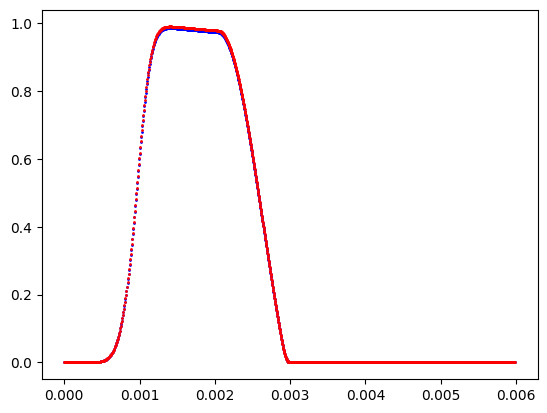

In [26]:
plt.plot(x_rf,m_trans_plus[:300], 'o', markersize=1, c='b')
plt.plot(x_spoil,m_trans_plus[300:600], 'o', markersize=1, c='b')
plt.plot(x_adc,m_trans_plus[600:], 'o', markersize=1, c='b')

plt.plot(x_rf,m_trans_minus[:300], 'o', markersize=1, c='r')
plt.plot(x_spoil,m_trans_minus[300:600], 'o', markersize=1, c='r')
plt.plot(x_adc,m_trans_minus[600:], 'o', markersize=1, c='r')
# plt.axhline(0, c='black')

# plt.xlim(0.0024, 0.0026)
# plt.ylim(0, 0.05)

In [37]:
m_z_plus

array([1.        , 1.        , 1.        , ..., 0.98998023, 0.98997595,
       0.98997563])